<a href="https://colab.research.google.com/github/daisydq74/MATH-4640/blob/main/4640_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import NumPy
import numpy as np
#import functions for LU decomposition
from scipy.linalg import lu_factor, lu_solve

# define matrix A and vector b
A = np.array([[14, 14, -9, 3, -5],
              [15, 52, -15, 2, -32],
              [-9, -15, 36, -5, 16],
              [3, 2, -5, 47, 49],
              [-5, -32, 16, 49, 79]])

b = np.array([-15, -100, 106, 329, 463])

# do LU factorization
lu= lu_factor(A)

# solve for x using the LU factors and pivoting
x = lu_solve(lu, b)

# print the LU factors
print("LU factors: \n", lu)
#LU factors:
#[[ 15.          52.         -15.           2.         -32.        ]
#[  0.93333333 -34.53333333   5.           1.13333333  24.86666667]
#[ -0.6         -0.46911197  29.34555985  -3.26833977   8.46525097]
#[ -0.33333333   0.42471042   0.3024801   50.17393593  55.21163081]
#[  0.2          0.24324324  -0.10959805   0.91613544  -0.30220508]]

# print the solution x
print("Solution x: \n", x)
#Solution x:
#[2.7000624e-14 1.0000000e+00 2.0000000e+00 3.0000000e+00 4.0000000e+00]

LU factors: 
 (array([[ 15.        ,  52.        , -15.        ,   2.        ,
        -32.        ],
       [  0.93333333, -34.53333333,   5.        ,   1.13333333,
         24.86666667],
       [ -0.6       ,  -0.46911197,  29.34555985,  -3.26833977,
          8.46525097],
       [ -0.33333333,   0.42471042,   0.3024801 ,  50.17393593,
         55.21163081],
       [  0.2       ,   0.24324324,  -0.10959805,   0.91613544,
         -0.30220508]]), array([1, 1, 2, 4, 4], dtype=int32))
Solution x: 
 [2.7000624e-14 1.0000000e+00 2.0000000e+00 3.0000000e+00 4.0000000e+00]


In [ ]:
#import NumPy
import numpy as np

# define matrix A and vector b
A = np.array([[14, 14, -9, 3, -5],
              [15, 52, -15, 2, -32],
              [-9, -15, 36, -5, 16],
              [3, 2, -5, 47, 49],
              [-5, -32, 16, 49, 79]])

b = np.array([-15, -100, 106, 329, 463])
n = len(A)

# set the diagonals of L to be 1 and other entries 0
L = [[0.0] * n for _ in range(n)]
for i in range(n):
    L[i][i] = 1.0

# set U = A
U = np.array([[14.0, 14.0, -9.0, 3.0, -5.0],
              [15.0, 52.0, -15.0, 2.0, -32.0],
              [-9.0, -15.0, 36.0, -5.0, 16.0],
              [3.0, 2, -5.0, 47.0, 49.0],
              [-5.0, -32.0, 16.0, 49.0, 79.0]])

# determine L and U
for i in range(n):
    for j in range(i):
        L[i][j] = U[i][j] / U[j][j]
        for k in range(n):
          U[i][k] -= L[i][j] * U[j][k]

# define vector x, and y as n-vectors
y = [0.0] * n
x = [0.0] * n

# Forward substitution (Ly = b)
for i in range(n):
    y[i] = b[i] - sum(L[i][j] * y[j] for j in range(i))

# Backward substitution (Ux = y)
for i in range(n - 1, -1, -1):
    x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]

# Print the LU factors
print("L is: ", L)

print("\nU is: ", U)

# Print the solution x
print("\nx is: ", x)

G = np.array([[14, 14, -9, 3, -5],
              [15, 52, -15, 2, -32],
              [-9, -15, 36, -5, 16],
              [3, 2, -5, 47, 49],
              [-5, -32, 16, 49, 79]])

print(np.dot(L, y))
print(y)
print(np.dot(G, x))


L is:  [[1.0, 0.0, 0.0, 0.0, 0.0], [1.0714285714285714, 1.0, 0.0, 0.0, 0.0], [-0.6428571428571429, -0.16216216216216217, 1.0, 0.0, 0.0], [0.21428571428571427, -0.02702702702702703, -0.10959805275968686, 1.0, 0.0], [-0.35714285714285715, -0.7297297297297297, 0.3024800999934214, 1.0915416662492432, 1.0]]

U is:  [[ 14.          14.          -9.           3.          -5.        ]
 [  0.          37.          -5.35714286  -1.21428571 -26.64285714]
 [  0.           0.          29.34555985  -3.26833977   8.46525097]
 [  0.           0.           0.          45.96612065  50.27912637]
 [  0.           0.           0.           0.           0.32986943]]

x is:  [-5.08799351856786e-14, 1.0000000000001075, 1.9999999999999296, 2.9999999999998117, 4.000000000000172]
[ -15. -100.  106.  329.  463.]
[-15, -83.92857142857143, 82.74710424710425, 339.0148674429314, 1.3194777389296064]
[ -15. -100.  106.  329.  463.]


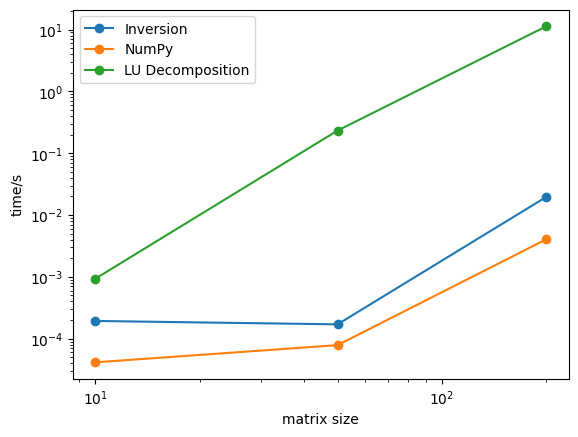

In [ ]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

# create three definitions for each methods

def solve_by_invert(A, b):
  A_inver = np.linalg.inv(A)
  return np.dot(A_inver, b)

def solve_by_np(A, b):
  return np.linalg.solve(A, b)

def solve_by_lu(A, b):
  n = len(A)
  L = [[0.0] * n for _ in range(n)]
  U = A
  for i in range(n):
      L[i][i] = 1.0
  for i in range(n):
      for j in range(i):
          L[i][j] = U[i][j] / U[j][j]
          for k in range(n):
            U[i][k] -= L[i][j] * U[j][k]
  y = [0.0] * n
  x = [0.0] * n
  for i in range(n):
      y[i] = b[i] - sum(L[i][j] * y[j] for j in range(i))
  for i in range(n - 1, -1, -1):
      x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]
  return x

# identify the possible sizes
sizes = [10, 50, 200]

# initialize table contents
methods = ["Inversion", "NumPy", "LU Decomposition"]
timings = {method: [] for method in methods}
start_time = 0

# iterate through the sizes and get randomized A and b
for n in sizes:
  A = np.random.rand(n, n)
  b = np.random.rand(n)

  # run through each methods and get the timings
  start_time = time.time()
  solve_by_invert(A, b)
  timings['Inversion'].append(time.time() - start_time)

  start_time = time.time()
  solve_by_np(A, b)
  timings['NumPy'].append(time.time() - start_time)

  start_time = time.time()
  solve_by_lu(A, b)
  timings['LU Decomposition'].append(time.time() - start_time)

# plot the results
for method in methods:
  plt.loglog(sizes, timings[method], marker='o', label=method)

plt.xlabel('matrix size')
plt.ylabel('time/s')
plt.legend()
plt.show()






